# Week 2 Task 2

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("rawpvr_2018-02-01_28d_1083 TueFri.csv")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d %H:%M:%S.%f")

data["Day_Number"] = data["Date"].dt.day
data["Hour"] = data["Date"].dt.hour

tue_data = data[(data["Hour"]==9) & (data["Direction Name"]=="North") & (data["Flags"]==2)]
print("Tuesday data shape: ", tue_data.shape)

Tuesday data shape:  (9721, 12)


In [3]:
print(tue_data.head(3))

                         Date  Lane Lane Name  Direction Direction Name  \
78847 2018-02-06 09:00:01.030     2    NB_MID          1          North   
78848 2018-02-06 09:00:01.030     3     NB_OS          1          North   
78849 2018-02-06 09:00:01.170     1     NB_NS          1          North   

       Speed (mph)  Headway (s)  Gap (s)  Flags Flag Text  Day_Number  Hour  
78847       32.932        5.026      NaN      2   Tuesday           6     9  
78848       32.310        3.946      NaN      2   Tuesday           6     9  
78849       31.691        3.035      NaN      2   Tuesday           6     9  


## 4 groups

In [19]:
tue_traffic_volume = tue_data.groupby("Day_Number").size()
print(tue_traffic_volume)

Day_Number
6     2537
13    2447
20    2311
27    2426
dtype: int64


In [21]:
tue_traffic_volume_range = tue_traffic_volume.max() - tue_traffic_volume.min()
tue_traffic_volume_fir_quar = tue_traffic_volume.quantile(0.25)
tue_traffic_volume_sec_quar = tue_traffic_volume.quantile(0.5)
tue_traffic_volume_thir_quar = tue_traffic_volume.quantile(0.75)
tue_traffic_volume_inter_range = tue_traffic_volume_thir_quar - tue_traffic_volume_fir_quar

print(tue_traffic_volume_range)
print(tue_traffic_volume_fir_quar)
print(tue_traffic_volume_sec_quar)
print(tue_traffic_volume_thir_quar)
print(tue_traffic_volume_inter_range)

226
2397.25
2436.5
2469.5
72.25


2397.25

## 12 groups

In [14]:
tue_traffic_volume2 = tue_data.groupby(["Day_Number", "Lane Name"]).size()
print(tue_traffic_volume2)

Day_Number  Lane Name
6           NB_MID       879
            NB_NS        743
            NB_OS        915
13          NB_MID       856
            NB_NS        710
            NB_OS        881
20          NB_MID       823
            NB_NS        682
            NB_OS        806
27          NB_MID       831
            NB_NS        780
            NB_OS        815
dtype: int64


In [18]:
tue_traffic_volume2_range = tue_traffic_volume2.max()-tue_traffic_volume2.min()
tue_traffic_volume2_fir_quar = tue_traffic_volume2.quantile(0.25)
tue_traffic_volume2_sec_quar = tue_traffic_volume2.quantile(0.5)
tue_traffic_volume2_thir_quar = tue_traffic_volume2.quantile(0.75)
tue_traffic_volume2_inter_range = tue_traffic_volume2_thir_quar - tue_traffic_volume2_fir_quar

print(tue_traffic_volume2_range)
print(tue_traffic_volume2_fir_quar)
print(tue_traffic_volume2_sec_quar)
print(tue_traffic_volume2_thir_quar)
print(tue_traffic_volume2_inter_range)
print(sorted(tue_traffic_volume2))
tue_traffic_volume2.quantile(0.1)

233
770.75
819.0
861.75
91.0
[682, 710, 743, 780, 806, 815, 823, 831, 856, 879, 881, 915]


713.3

# Week 2 Task 3

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("rawpvr_2018-02-01_28d_1083 TueFri.csv")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d %H:%M:%S.%f")
data["Day_Number"] = data["Date"].dt.day
data["Hour"] = data["Date"].dt.hour

## North

In [12]:
tue_data_north = data[(data["Direction Name"]=="North") & (data["Flags"]==2)]
print("Tuesday data north lane shape: ", tue_data_north.shape)

Tuesday data north lane shape:  (124578, 12)


In [4]:
print(tue_data_north.head(3))

                         Date  Lane Lane Name  Direction Direction Name  \
64601 2018-02-06 00:00:07.010     3     NB_OS          1          North   
64603 2018-02-06 00:00:14.020     2    NB_MID          1          North   
64604 2018-02-06 00:00:41.060     2    NB_MID          1          North   

       Speed (mph)  Headway (s)  Gap (s)  Flags Flag Text  Day_Number  Hour  
64601       45.361          NaN      NaN      2   Tuesday           6     0  
64603       33.554          NaN      NaN      2   Tuesday           6     0  
64604       44.739          NaN      NaN      2   Tuesday           6     0  


In [5]:
tue_data_north_total = tue_data_north.groupby(["Hour"]).size()



tue_data_north_average = tue_data_north_total/4
print("Average traffic volume of each hour", tue_data_north_average)

Average traffic volume of each hour Hour
0      126.50
1       63.00
2       42.50
3       53.00
4      108.25
5      361.50
6     1260.00
7     2951.50
8     2727.00
9     2430.25
10    1776.75
11    1634.25
12    1698.75
13    1707.50
14    1642.00
15    1805.25
16    2429.00
17    2655.75
18    2121.50
19    1308.25
20     882.75
21     648.75
22     453.75
23     256.75
dtype: float64


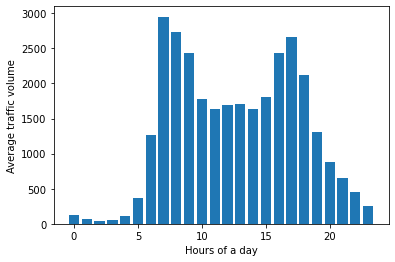

In [6]:
plt.bar(list(range(0,24)), tue_data_north_average)
plt.xlabel("Hours of a day")
plt.ylabel("Average traffic volume")
plt.show()

## South

In [15]:
tue_data_south = data[(data["Direction Name"]=="South") & (data["Flags"]==2)]
print("Tuesday data south lane shape: ", tue_data_south.shape)

Tuesday data south lane shape:  (123439, 12)


In [16]:
tue_data_south_total = tue_data_south.groupby("Hour").size()



tue_data_south_average = tue_data_south_total/4
print(tue_data_south_average)

Hour
0      162.75
1       92.75
2       77.50
3       79.75
4      120.50
5      289.75
6      862.25
7     2015.00
8     2135.00
9     1548.25
10    1402.00
11    1543.50
12    1709.25
13    1749.50
14    1992.00
15    2481.50
16    3001.25
17    2794.00
18    2330.50
19    1601.75
20    1080.25
21     847.00
22     612.75
23     331.00
dtype: float64


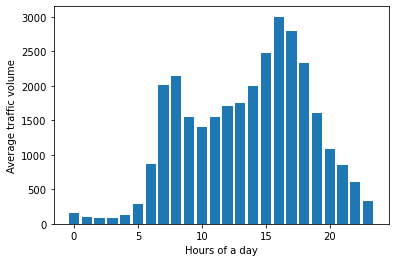

In [17]:
plt.bar(list(range(0,24)), tue_data_south_average)
plt.xlabel("Hours of a day")
plt.ylabel("Average traffic volume")
plt.show()